# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=2, sort_keys=True))

{
  "data": {
    "1": {
      "circulating_supply": 19185850,
      "id": 1,
      "last_updated": 1666392262,
      "max_supply": 21000000,
      "name": "Bitcoin",
      "quotes": {
        "USD": {
          "market_cap": 367949323797,
          "percent_change_1h": 0.0918564215449306,
          "percent_change_24h": 0.86301766842939,
          "percent_change_7d": -1.06279179946719,
          "percentage_change_1h": 0.0918564215449306,
          "percentage_change_24h": 0.86301766842939,
          "percentage_change_7d": -1.06279179946719,
          "price": 19177.93,
          "volume_24h": 30520986778
        }
      },
      "rank": 1,
      "symbol": "BTC",
      "total_supply": 19185850,
      "website_slug": "bitcoin"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3116,
    "timestamp": 1666392262
  }
}


In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=2, sort_keys=True))

{
  "data": {
    "1027": {
      "circulating_supply": 120523829,
      "id": 1027,
      "last_updated": 1666392264,
      "max_supply": 120523829,
      "name": "Ethereum",
      "quotes": {
        "USD": {
          "market_cap": 156679940610,
          "percent_change_1h": 0.0211531410718103,
          "percent_change_24h": 1.50917373657215,
          "percent_change_7d": 0.907203706842341,
          "percentage_change_1h": 0.0211531410718103,
          "percentage_change_24h": 1.50917373657215,
          "percentage_change_7d": 0.907203706842341,
          "price": 1299.85,
          "volume_24h": 8881445754
        }
      },
      "rank": 2,
      "symbol": "ETH",
      "total_supply": 120523829,
      "website_slug": "ethereum"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3116,
    "timestamp": 1666392264
  }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
print(f"${btc_price:.2f}")


$19177.93


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
print(f"${eth_price:.2f}")


$1299.85


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f"${btc_value:.2f}")


$23013.52


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f"${eth_value:.2f}")


$6889.20


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"${total_crypto_wallet:.2f}")


$29902.72


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe = "1day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2020-08-07", tz = "America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz = "America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
ticker_data = alpaca.get_bars(tickers, timeframe, start = start_date, end = end_date).df
# Reorganize the DataFrame
# Separate ticker data
SPY=ticker_data[ticker_data['symbol'] == 'SPY'].drop('symbol', axis = 1)
AGG=ticker_data[ticker_data['symbol'] == 'AGG'].drop('symbol', axis = 1)
# Concatenate the ticker DataFrames
ticker_data = pd.concat([SPY, AGG], axis=1, keys=['SPY','AGG'])

# Review the first 5 rows of the Alpaca DataFrame
ticker_data.head()


SPY                                   \
                             open    high    low   close    volume   
timestamp                                                            
2020-08-07 04:00:00+00:00  333.29  334.88  332.3  334.57  57282821   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.73  119.395   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-08-07 04:00:00+00:00  119.43  5559066       15246  119.475306

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = ticker_data['AGG']['close'][0] 

# Print the AGG closing price
agg_close_price


119.43

In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = ticker_data['SPY']['close'][0]

# Print the SPY closing price
spy_close_price


334.57

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
agg_value


23886.0

In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
spy_value

36802.7

In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
total_stocks_bonds


60688.7

In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds
# Print current cryptocurrency wallet balance
total_portfolio


90591.421

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]


# Review the Python list savings_data
savings_data

[29902.720999999998, 60688.7]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns=["amount"], index=['crypto','stocks/bonds'])

# Display the savings_df DataFrame
savings_df


,amount
crypto,29902.721
stocks/bonds,60688.700


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':"Member's Portfolio Structure"}, ylabel='amount'>

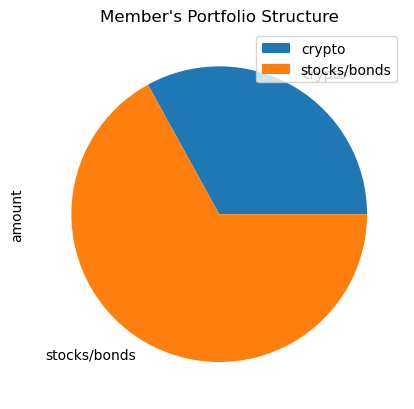

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', title="Member's Portfolio Structure")


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("Congrats! You have enough money in the fund!")
elif total_portfolio == emergency_fund_value:
    print("You hit your goal!")
else:
    print(f'You are ${total_portfolio - emergency_fund_value} short!')


Congrats! You have enough money in the fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [31]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2019-10-20", tz = "America/New_York").isoformat()
end_date = pd.Timestamp("2022-10-20", tz = "America/New_York").isoformat()

In [48]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
df_portfolio = alpaca.get_bars(tickers, timeframe, start = start_date, end = end_date).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol',axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol',axis=1)
# Concatenate the ticker DataFrames
df_portfolio=pd.concat([AGG, SPY], axis = 1, keys = ['AGG', 'SPY'])

# Display both the first and last five rows of the DataFrame
display(df_portfolio.head())
df_portfolio.tail()


AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2019-10-21 04:00:00+00:00  112.62  112.7100  112.4900  112.49  4241641   
2019-10-22 04:00:00+00:00  112.72  112.7375  112.5100  112.66  2147528   
2019-10-23 04:00:00+00:00  112.82  112.8800  112.7300  112.75  1888027   
2019-10-24 04:00:00+00:00  112.84  112.9459  112.7500  112.78  1726018   
2019-10-25 04:00:00+00:00  112.84  112.8500  112.5229  112.62  2486700   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2019-10-21 04:00:00+00:00       12358  112.536605  299.48  300.21  298.9350   
2019-10-22 04:00:00+00:00       10716  112.635037  300.63  300.90  298.9100   
2019-10-23 04:00:00+00:00        7823  112.796194  298.74  299.94  298.4950   
2019-10-24 04:00:00+00:00        7848  112.858594  300.88  301.07  299.4601   
2019-10-25 04:00:00+00:00        9742  112.645555  299.74  302.20  299.6806   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2019-10-21 04:00:00+00:00  299.99  39733263      193936  299.662986  
2019-10-22 04:00:00+00:00  299.01  49156505      227131  300.087292  
2019-10-23 04:00:00+00:00  299.88  35235859      191628  299.334407  
2019-10-24 04:00:00+00:00  300.37  35889568      211246  300.195329  
2019-10-25 04:00:00+00:00  301.60  45705877      215213  301.494776

AGG                                    \
                            open     high      low  close   volume   
timestamp                                                            
2022-10-14 04:00:00+00:00  95.63  95.6300  94.6100  94.66  8567937   
2022-10-17 04:00:00+00:00  95.28  95.4000  94.8300  94.86  5455448   
2022-10-18 04:00:00+00:00  95.11  95.1800  94.6400  95.02  6108720   
2022-10-19 04:00:00+00:00  94.41  94.5584  94.1528  94.20  6295299   
2022-10-20 04:00:00+00:00  94.06  94.2555  93.5648  93.63  8860510   

                                                     SPY                      \
                          trade_count       vwap    open      high       low   
timestamp                                                                      
2022-10-14 04:00:00+00:00       22665  94.776094  368.54  370.2600  356.9600   
2022-10-17 04:00:00+00:00       20840  95.037152  363.99  367.9799  357.2808   
2022-10-18 04:00:00+00:00       21495  94.955551  375.07  375.4500  367.5200   
2022-10-19 04:00:00+00:00       18782  94.314399  368.98  371.8500  365.5500   
2022-10-20 04:00:00+00:00       19980  93.841305  368.07  372.6700  364.6100   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-10-14 04:00:00+00:00  357.63  122920585      818595  361.365272  
2022-10-17 04:00:00+00:00  366.82   92765345      609955  365.954505  
2022-10-18 04:00:00+00:00  371.13   96898206      675916  371.126991  
2022-10-19 04:00:00+00:00  368.50   79481512      531675  368.665769  
2022-10-20 04:00:00+00:00  365.41   87963935      634944  367.710482

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [51]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_thirtyyear = MCSimulation(
    portfolio_data = df_portfolio,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*30)

# Review the simulation input data
MC_thirtyyear.portfolio_data


AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2019-10-21 04:00:00+00:00  112.62  112.7100  112.4900  112.49  4241641   
2019-10-22 04:00:00+00:00  112.72  112.7375  112.5100  112.66  2147528   
2019-10-23 04:00:00+00:00  112.82  112.8800  112.7300  112.75  1888027   
2019-10-24 04:00:00+00:00  112.84  112.9459  112.7500  112.78  1726018   
2019-10-25 04:00:00+00:00  112.84  112.8500  112.5229  112.62  2486700   
...                           ...       ...       ...     ...      ...   
2022-10-14 04:00:00+00:00   95.63   95.6300   94.6100   94.66  8567937   
2022-10-17 04:00:00+00:00   95.28   95.4000   94.8300   94.86  5455448   
2022-10-18 04:00:00+00:00   95.11   95.1800   94.6400   95.02  6108720   
2022-10-19 04:00:00+00:00   94.41   94.5584   94.1528   94.20  6295299   
2022-10-20 04:00:00+00:00   94.06   94.2555   93.5648   93.63  8860510   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-10-21 04:00:00+00:00       12358  112.536605          NaN  299.48   
2019-10-22 04:00:00+00:00       10716  112.635037     0.001511  300.63   
2019-10-23 04:00:00+00:00        7823  112.796194     0.000799  298.74   
2019-10-24 04:00:00+00:00        7848  112.858594     0.000266  300.88   
2019-10-25 04:00:00+00:00        9742  112.645555    -0.001419  299.74   
...                               ...         ...          ...     ...   
2022-10-14 04:00:00+00:00       22665   94.776094    -0.005463  368.54   
2022-10-17 04:00:00+00:00       20840   95.037152     0.002113  363.99   
2022-10-18 04:00:00+00:00       21495   94.955551     0.001687  375.07   
2022-10-19 04:00:00+00:00       18782   94.314399    -0.008630  368.98   
2022-10-20 04:00:00+00:00       19980   93.841305    -0.006051  368.07   

                                                                              \
                               high       low   close     volume trade_count   
timestamp                                                                      
2019-10-21 04:00:00+00:00  300.2100  298.9350  299.99   39733263      193936   
2019-10-22 04:00:00+00:00  300.9000  298.9100  299.01   49156505      227131   
2019-10-23 04:00:00+00:00  299.9400  298.4950  299.88   35235859      191628   
2019-10-24 04:00:00+00:00  301.0700  299.4601  300.37   35889568      211246   
2019-10-25 04:00:00+00:00  302.2000  299.6806  301.60   45705877      215213   
...                             ...       ...     ...        ...         ...   
2022-10-14 04:00:00+00:00  370.2600  356.9600  357.63  122920585      818595   
2022-10-17 04:00:00+00:00  367.9799  357.2808  366.82   92765345      609955   
2022-10-18 04:00:00+00:00  375.4500  367.5200  371.13   96898206      675916   
2022-10-19 04:00:00+00:00  371.8500  365.5500  368.50   79481512      531675   
2022-10-20 04:00:00+00:00  372.6700  364.6100  365.41   87963935      634944   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-10-21 04:00:00+00:00  299.662986          NaN  
2019-10-22 04:00:00+00:00  300.087292    -0.003267  
2019-10-23 04:00:00+00:00  299.334407     0.002910  
2019-10-24 04:00:00+00:00  300.195329     0.001634  
2019-10-25 04:00:00+00:00  301.494776     0.004095  
...                               ...          ...  
2022-10-14 04:00:00+00:00  361.365272    -0.022789  
2022-10-17 04:00:00+00:00  365.954505     0.025697  
2022-10-18 04:00:00+00:00  371.126991     0.011750  
2022-10-19 04:00:00+00:00  368.665769    -0.007086  
2022-10-20 04:00:00+00:00  367.710482    -0.008385  

[757 rows x 16 columns]

In [50]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 110.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 120.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 130.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 140.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 150.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 160.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 170.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 180.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 190.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 200.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 210.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 220.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 230.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 240.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 250.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 260.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 270.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 280.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 290.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 300.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 310.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 320.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 330.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 340.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 350.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 360.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 370.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 380.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 390.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 400.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 410.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 420.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 430.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 440.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 450.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 460.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 470.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 480.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 490.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004007,1.008072,0.998528,0.998133,0.998211,1.001553,0.997439,0.994076,1.002796,1.000826,...,0.995730,1.013941,0.996358,1.011990,1.002661,1.001141,1.000648,0.991574,0.997324,0.998456
2,1.007292,1.005329,0.994605,1.004024,1.002948,1.001258,0.994793,0.990009,0.998117,1.003213,...,1.001118,1.010624,0.992155,1.010031,0.997102,0.995328,0.983993,1.000890,1.007991,0.996082
3,1.004557,1.007685,0.987198,0.999613,1.000498,1.007624,1.002392,0.994522,0.989745,1.000143,...,1.003088,1.014866,0.986826,1.009932,0.996941,1.000469,0.993064,1.000328,1.012533,0.997234
4,1.012536,1.002811,0.987230,0.996779,0.993374,1.010214,1.004108,0.995496,0.987640,0.998752,...,1.011807,1.016892,0.987526,0.996466,0.996026,1.007565,0.997203,0.997983,1.007670,0.995044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.849824,1.602859,1.651442,1.188573,0.287996,0.201308,1.204984,0.740974,0.385201,0.984551,...,0.372503,1.427152,0.684698,0.872543,1.283700,1.021028,0.874161,0.429872,0.461510,2.007559
7557,0.851100,1.590465,1.653410,1.198453,0.287999,0.201368,1.196985,0.735279,0.383909,0.981614,...,0.369701,1.422758,0.684312,0.864888,1.279801,1.019966,0.874327,0.429182,0.456729,1.976985
7558,0.850256,1.576414,1.642996,1.203237,0.285969,0.200791,1.193048,0.731002,0.383083,0.987845,...,0.369125,1.426470,0.686181,0.865587,1.278366,1.021871,0.863236,0.428409,0.455789,1.982954
7559,0.854965,1.588581,1.658001,1.203505,0.286650,0.200268,1.188861,0.733759,0.383111,0.988219,...,0.370375,1.422506,0.688988,0.868866,1.288495,1.025817,0.859608,0.431126,0.450069,1.999158


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 110.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 120.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 130.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 140.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 150.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 160.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 170.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 180.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 190.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 200.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 210.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 220.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 230.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 240.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 250.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 260.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 270.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 280.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 290.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 300.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 310.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 320.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 330.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 340.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 350.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 360.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 370.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 380.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 390.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 400.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 410.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 420.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 430.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 440.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 450.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 460.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 470.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 480.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 490.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

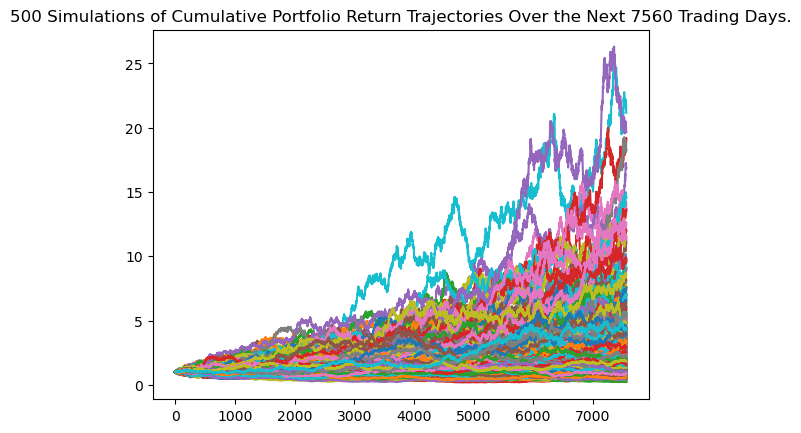

In [52]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_thirtyyear.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

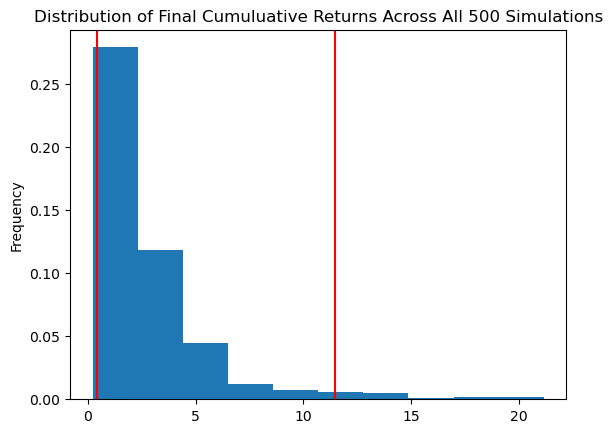

In [53]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_thirtyyear.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [55]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics=MC_thirtyyear.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)

count           500.000000
mean              2.891106
std               2.868283
min               0.222604
25%               1.208183
50%               1.969446
75%               3.555265
max              21.171643
95% CI Lower      0.434430
95% CI Upper     11.468485
Name: 7560, dtype: float64


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [56]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds


60688.7

In [57]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(total_stocks_bonds * MC_summary_statistics[8],2)
ci_upper_thirty_cumulative_return = round(total_stocks_bonds * MC_summary_statistics[9],2)

# Print the result of your calculations
print(f"If the ${total_stocks_bonds:.2f} is invested for thirty years; the value of the portfolio will be between ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}") 


If the $60688.70 is invested for thirty years; the value of the portfolio will be between $26365.01 and $696007.44


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [59]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_tenyear = MCSimulation(
    portfolio_data = df_portfolio,
    weights=[.80,.20],
    num_simulation=500,
    num_trading_days=252*10)

# Review the simulation input data
MC_tenyear.portfolio_data.head()


AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2019-10-21 04:00:00+00:00  112.62  112.7100  112.4900  112.49  4241641   
2019-10-22 04:00:00+00:00  112.72  112.7375  112.5100  112.66  2147528   
2019-10-23 04:00:00+00:00  112.82  112.8800  112.7300  112.75  1888027   
2019-10-24 04:00:00+00:00  112.84  112.9459  112.7500  112.78  1726018   
2019-10-25 04:00:00+00:00  112.84  112.8500  112.5229  112.62  2486700   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-10-21 04:00:00+00:00       12358  112.536605          NaN  299.48   
2019-10-22 04:00:00+00:00       10716  112.635037     0.001511  300.63   
2019-10-23 04:00:00+00:00        7823  112.796194     0.000799  298.74   
2019-10-24 04:00:00+00:00        7848  112.858594     0.000266  300.88   
2019-10-25 04:00:00+00:00        9742  112.645555    -0.001419  299.74   

                                                                           \
                             high       low   close    volume trade_count   
timestamp                                                                   
2019-10-21 04:00:00+00:00  300.21  298.9350  299.99  39733263      193936   
2019-10-22 04:00:00+00:00  300.90  298.9100  299.01  49156505      227131   
2019-10-23 04:00:00+00:00  299.94  298.4950  299.88  35235859      191628   
2019-10-24 04:00:00+00:00  301.07  299.4601  300.37  35889568      211246   
2019-10-25 04:00:00+00:00  302.20  299.6806  301.60  45705877      215213   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-10-21 04:00:00+00:00  299.662986          NaN  
2019-10-22 04:00:00+00:00  300.087292    -0.003267  
2019-10-23 04:00:00+00:00  299.334407     0.002910  
2019-10-24 04:00:00+00:00  300.195329     0.001634  
2019-10-25 04:00:00+00:00  301.494776     0.004095

In [60]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 110.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 120.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 130.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 140.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 150.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 160.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 170.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 180.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 190.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 200.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 210.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 220.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 230.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 240.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 250.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 260.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 270.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 280.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 290.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 300.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 310.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 320.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 330.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 340.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 350.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 360.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 370.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 380.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 390.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 400.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 410.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 420.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 430.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 440.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 450.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 460.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 470.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 480.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

Running Monte Carlo simulation number 490.


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/bennettsmookler/Desktop/Github_Upload/Financial

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001717,0.991321,0.992476,1.001989,1.002157,1.000911,1.003093,1.010401,1.007426,0.996989,...,1.006056,0.997244,0.994037,0.998137,0.997774,0.996956,1.009518,0.996169,1.005247,0.995491
2,1.004651,0.993520,0.992372,1.007485,1.003392,0.993967,1.005041,1.012090,1.002966,1.002732,...,1.009118,0.994844,0.996258,1.002904,0.993150,0.995694,1.009617,0.994372,1.007944,0.994537
3,1.007076,0.994590,0.992335,1.006097,1.012602,0.987547,1.004330,1.009672,0.998632,1.002788,...,1.017629,0.994956,0.994392,1.000219,0.987547,0.993899,1.001050,0.983642,1.017553,0.992450
4,1.013015,0.990663,0.993953,1.007853,1.017832,0.987119,1.001490,1.002957,1.001498,1.001560,...,1.016259,0.989474,0.987829,0.998975,0.988484,0.992379,0.997463,0.976018,1.013003,0.992716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.759895,1.114500,0.755963,0.963520,0.672246,0.648280,0.550082,0.639747,0.698678,0.863758,...,1.045425,0.741570,0.566709,0.747608,0.605800,0.681050,0.745189,0.711378,0.918822,0.969756
2517,0.759867,1.109689,0.754698,0.974276,0.673488,0.649617,0.546087,0.640470,0.698958,0.862799,...,1.048148,0.746863,0.567357,0.745049,0.607331,0.685829,0.745280,0.714636,0.923264,0.970086
2518,0.760681,1.103352,0.754139,0.967471,0.677409,0.651489,0.545890,0.641594,0.697783,0.859718,...,1.051761,0.747951,0.564907,0.746711,0.606337,0.687263,0.746261,0.713961,0.922631,0.972102
2519,0.764725,1.089952,0.750922,0.972852,0.677709,0.652526,0.545747,0.643224,0.695230,0.855509,...,1.043728,0.753578,0.564143,0.751167,0.607527,0.688654,0.744620,0.715076,0.924864,0.972511


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

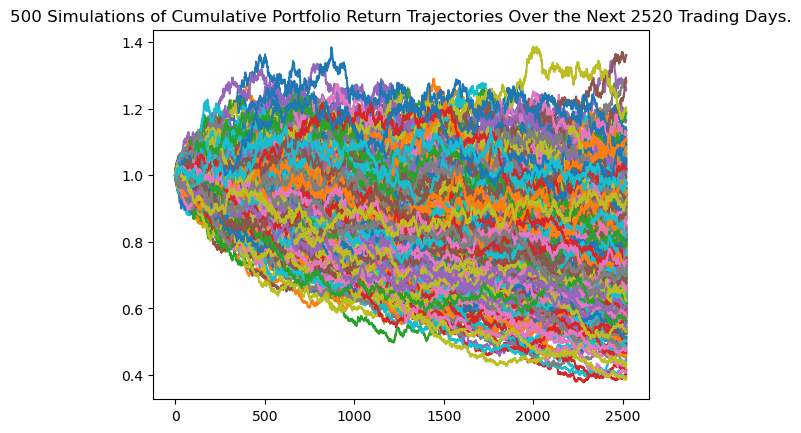

In [62]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_tenyear.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

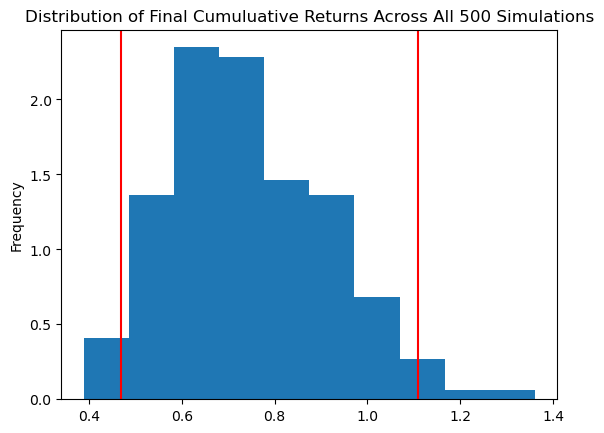

In [63]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_tenyear.plot_distribution()


In [64]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_tenyear_summarystats = MC_tenyear.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_tenyear_summarystats)

count           500.000000
mean              0.744842
std               0.170619
min               0.389468
25%               0.614731
50%               0.724232
75%               0.854133
max               1.360387
95% CI Lower      0.469304
95% CI Upper      1.108861
Name: 2520, dtype: float64


/Users/bennettsmookler/Desktop/Github_Upload/Financial-Planning-with-Apis-and-Simulations/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [65]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds


60688.7

In [66]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(total_stocks_bonds * MC_tenyear_summarystats[8],2)
ci_upper_ten_cumulative_return = round(total_stocks_bonds * MC_tenyear_summarystats[9],2)

# Print the result of your calculations
print(f"If initial investment ${total_stocks_bonds} after ten years the portfolio will be between ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}")


If initial investment $60688.7 after ten years the portfolio will be between $28481.46 and $67295.35


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?